In [15]:
import pandas as pd
import yfinance as yf
import talib

import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

$ \large RSI = 100 - \Large\frac{100}{1+Relative Strength} $
$ Relative Strength = \frac{closes up}{closes down} $

talib rsi 
    `real = RSI(close, timeperiod=14)`

In [34]:
# Set default plotting parameters
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('husl')
sns.set_style('white')
sns.set_context('talk')

In [35]:
# list of tickers we're interested in
stock_list = ['AAPL', 'SPY', 'ARKK', 'F', 'NKE']

# empty dictionary to store dataframes as we collect them
stock_dict = {}

# use yfinance to get historical data
for stock in stock_list:
    temp = yf.Ticker(stock)
    temp = temp.history(period='max')
    stock_dict[stock] = temp
    
stock_dict['SPY'].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-01-29,25.987428,25.987428,25.858137,25.968958,1003200,0.0,0
1993-02-01,25.987429,26.153660,25.987429,26.153660,480500,0.0,0
1993-02-02,26.135176,26.227527,26.079766,26.209057,201300,0.0,0
1993-02-03,26.246001,26.504583,26.227531,26.486113,529400,0.0,0
1993-02-04,26.578467,26.652347,26.282946,26.596937,531500,0.0,0


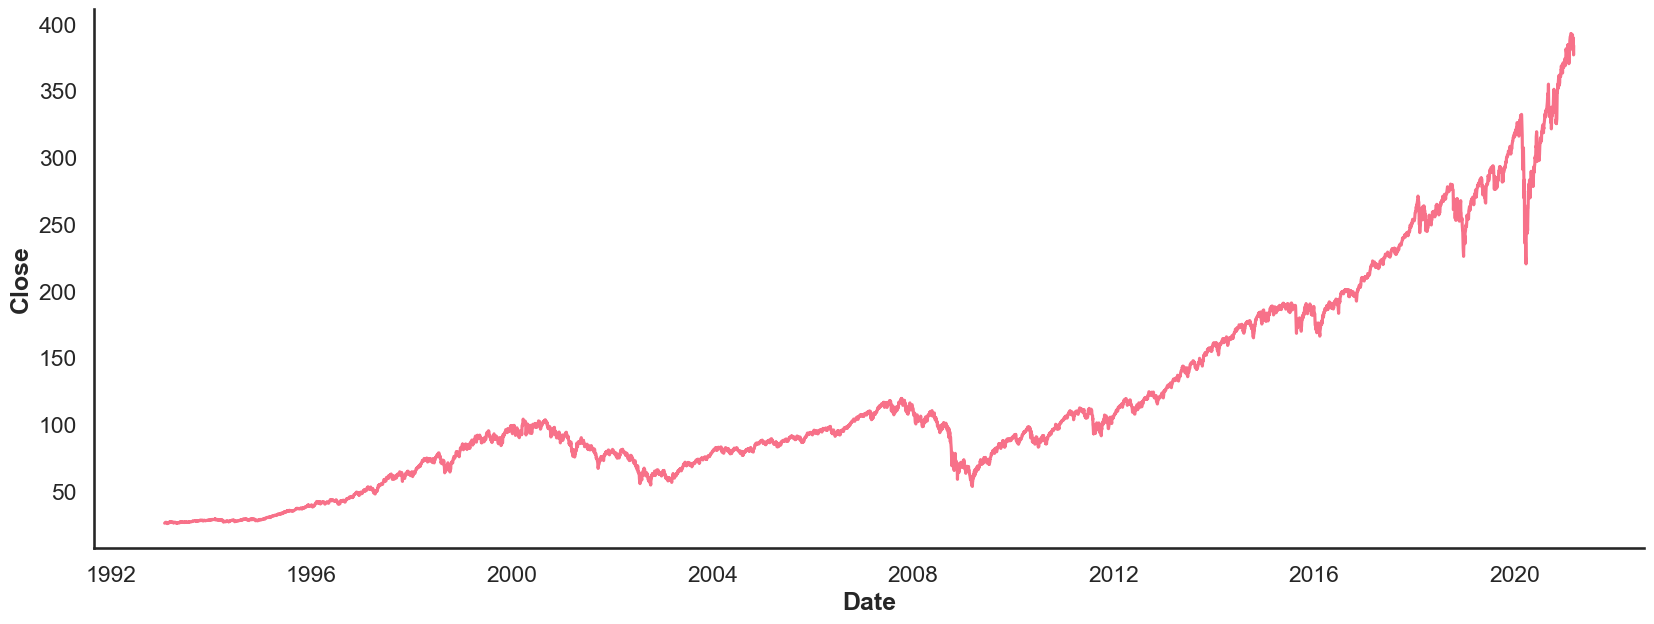

In [42]:
fig, ax = plt.subplots()
sns.lineplot(x=stock_dict['SPY'].index, y='Close', data=stock_dict['SPY'])
sns.despine()
plt.show()

In [10]:
rsi = talib.RSI(stock_dict['SPY'].Close)

In [11]:
spy_df = stock_dict['SPY'].copy()
spy_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-01-29,25.987428,25.987428,25.858137,25.968958,1003200,0.0,0
1993-02-01,25.987429,26.153660,25.987429,26.153660,480500,0.0,0
1993-02-02,26.135176,26.227527,26.079766,26.209057,201300,0.0,0
1993-02-03,26.246001,26.504583,26.227531,26.486113,529400,0.0,0
1993-02-04,26.578467,26.652347,26.282946,26.596937,531500,0.0,0


In [12]:
spy_df['rsi'] = talib.RSI(spy_df.Close)

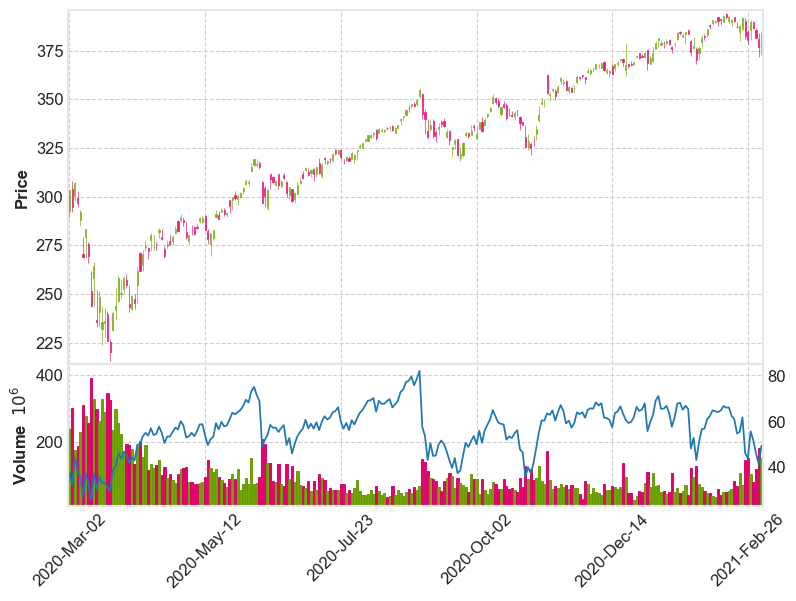

In [31]:
kws=dict(volume=True,tight_layout=True)
apds = mpf.make_addplot(plot_df.rsi,type='line', panel=1)
mpf.plot(plot_df, type='candle', **kws, style='binance',addplot=apds)